In [2]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import time
import re

In [ ]:
fablib = fablib_manager()      
slice = fablib.get_slice('dh-aes-basic')

server_log_file = f"/home/fabric/work/aes/logs/server_{time.time_ns()}.log"
slice.get_node("server").download_file(server_log_file, f"/home/ubuntu/server.log")

client_log_file = f"/home/fabric/work/aes/logs/client_{time.time_ns()}.log"
slice.get_node("station").download_file(client_log_file, f"/home/ubuntu/server.log")

# switch_log_file = f"/home/fabric/work/aes/logs/client_{time.time_ns()}.log"
# slice.get_node("station").download_file(client_log_file, f"/home/ubuntu/server.log")

In [17]:
server_log_file = "/home/fabric/work/aes/logs/server_1713727844060183994.log"
client_log_file = "/home/fabric/work/aes/logs/client_1713727846829777569.log"

In [18]:
print(server_log_file)
print(client_log_file)

/home/fabric/work/aes/logs/server_1713727844060183994.log
/home/fabric/work/aes/logs/client_1713727846829777569.log


In [19]:
# plotting client metrics
log_data = open(client_log_file, 'r').read()

In [20]:

# Lists to hold time data
key_exchange_times = []
encrypt_times = []
decrypt_times = []

# Regex to extract timings
for line in log_data.split('\n'):
    if "Time taken for key exchange" in line:
        key_exchange_times.append(float(re.search(r": (\d+\.\d+)", line).group(1)))
    elif "Time taken for encrypting message" in line:
        encrypt_times.append(float(re.search(r": (\d+\.\d+)", line).group(1)))
    elif "Time taken for decrypting message" in line:
        decrypt_times.append(float(re.search(r": (\d+\.\d+)", line).group(1)))

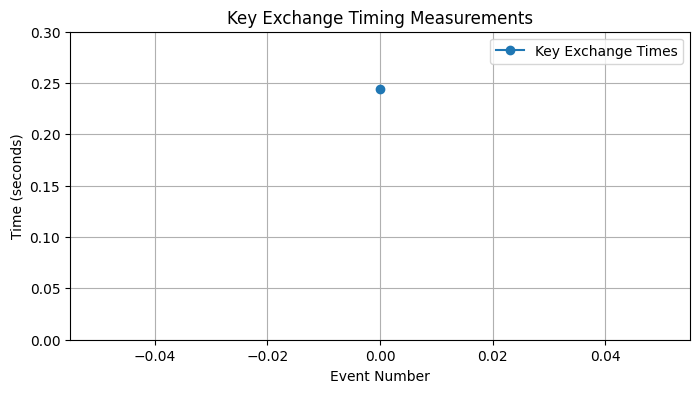

In [21]:
# Graph for Key Exchange Time
plt.figure(figsize=(8, 4))
plt.plot(key_exchange_times, label='Key Exchange Times', marker='o')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.title('Key Exchange Timing Measurements')
plt.grid(True)
plt.ylim(0.0, 0.3)
plt.legend()
plt.show()

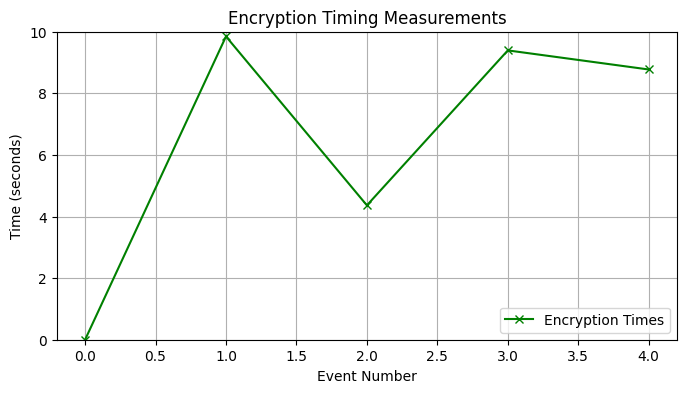

In [22]:
# Graph for Encryption Time
plt.figure(figsize=(8, 4))
plt.plot(encrypt_times, label='Encryption Times', marker='x', color='green')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.title('Encryption Timing Measurements')
plt.grid(True)
plt.ylim(0, 10)
plt.legend()
plt.show()

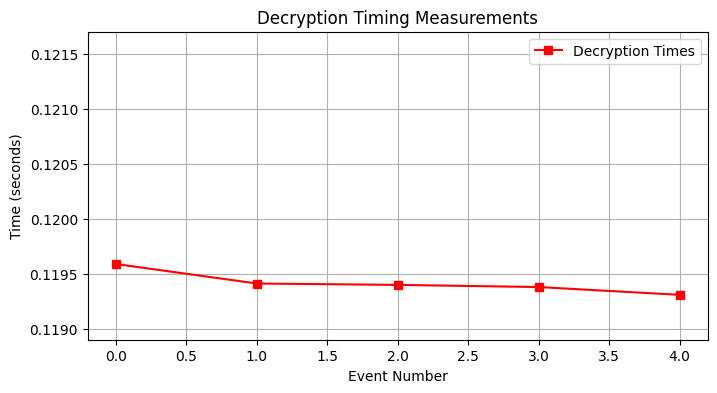

In [23]:
# Graph for Decryption Time
plt.figure(figsize=(8, 4))
plt.plot(decrypt_times, label='Decryption Times', marker='s', color='red')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.title('Decryption Timing Measurements')
plt.grid(True)
plt.ylim(0.11890, 0.1217)
plt.legend()
plt.show()

In [24]:
# analyze server log file
log_data = open(server_log_file, 'r').read()

In [25]:
# Lists to store the timing data
key_share_times = []
encryption_times = []
decryption_times = []
# Lists to store the timestamps of received messages
received_timestamps = []


# Extracting data using regular expressions
for line in log_data.split('\n'):
    if "Key share time" in line:
        key_share_times.append(float(re.search(r"Key share time: (\d+\.\d+)", line).group(1)))
    elif "Encryption time" in line:
        encryption_times.append(float(re.search(r"Encryption time: (\d+\.\d+)", line).group(1)))
    elif "Decryption time" in line:
        decryption_times.append(float(re.search(r"Decryption time: (\d+\.\d+)", line).group(1)))
    if "Received:" in line:
        timestamp_str = line.split(' -')[0].strip()
        print(timestamp_str)
        timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S,%f')
        received_timestamps.append(timestamp)
        print(received_timestamps)


2024-04-21 19:29:32,353
[datetime.datetime(2024, 4, 21, 19, 29, 32, 353000)]
2024-04-21 19:29:32,595
[datetime.datetime(2024, 4, 21, 19, 29, 32, 353000), datetime.datetime(2024, 4, 21, 19, 29, 32, 595000)]
2024-04-21 19:29:32,849
[datetime.datetime(2024, 4, 21, 19, 29, 32, 353000), datetime.datetime(2024, 4, 21, 19, 29, 32, 595000), datetime.datetime(2024, 4, 21, 19, 29, 32, 849000)]
2024-04-21 19:29:33,098
[datetime.datetime(2024, 4, 21, 19, 29, 32, 353000), datetime.datetime(2024, 4, 21, 19, 29, 32, 595000), datetime.datetime(2024, 4, 21, 19, 29, 32, 849000), datetime.datetime(2024, 4, 21, 19, 29, 33, 98000)]
2024-04-21 19:29:33,344
[datetime.datetime(2024, 4, 21, 19, 29, 32, 353000), datetime.datetime(2024, 4, 21, 19, 29, 32, 595000), datetime.datetime(2024, 4, 21, 19, 29, 32, 849000), datetime.datetime(2024, 4, 21, 19, 29, 33, 98000), datetime.datetime(2024, 4, 21, 19, 29, 33, 344000)]


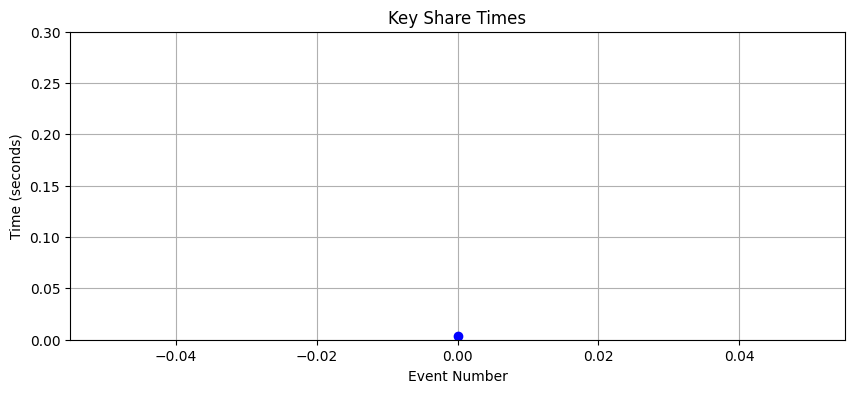

In [26]:
# Plotting Key Share Times
plt.figure(figsize=(10, 4))
plt.plot(key_share_times, marker='o', linestyle='-', color='b')
plt.title('Key Share Times')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.ylim(0.0, 0.3)
plt.show()

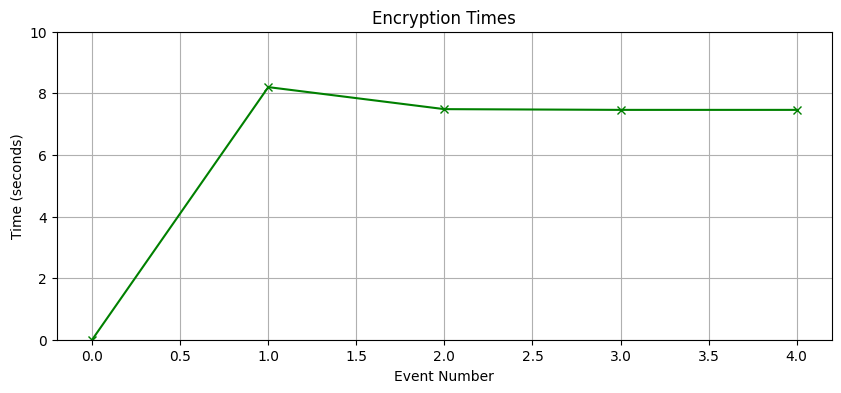

In [27]:
# Plotting Encryption Times
plt.figure(figsize=(10, 4))
plt.plot(encryption_times, marker='x', linestyle='-', color='g')
plt.title('Encryption Times')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.ylim(0, 10)
plt.show()

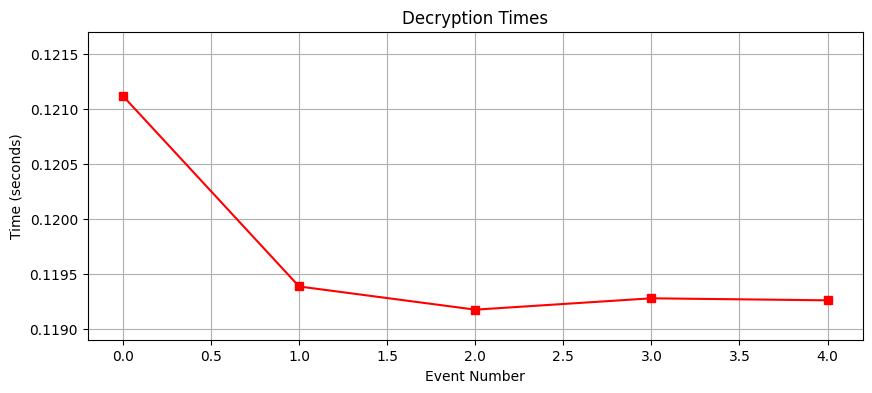

In [28]:
# Plotting Decryption Times
plt.figure(figsize=(10, 4))
plt.plot(decryption_times, marker='s', linestyle='-', color='r')
plt.title('Decryption Times')
plt.xlabel('Event Number')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.ylim(0.11890, 0.1217)
plt.show()

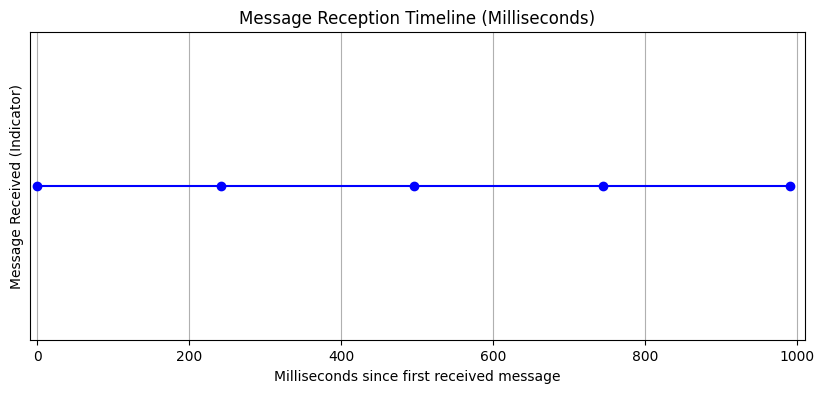

In [29]:
times_in_ms = [(ts - received_timestamps[0]).total_seconds() * 1000 for ts in received_timestamps]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(times_in_ms, [1] * len(times_in_ms), marker='o', linestyle='-', color='b')  # Connect points with lines
plt.title('Message Reception Timeline (Milliseconds)')
plt.xlabel('Milliseconds since first received message')
plt.ylabel('Message Received (Indicator)')
plt.yticks([])  # Hide y-axis ticks as they are not informative
plt.grid(True)
plt.xlim(-10, 1010)
plt.show()

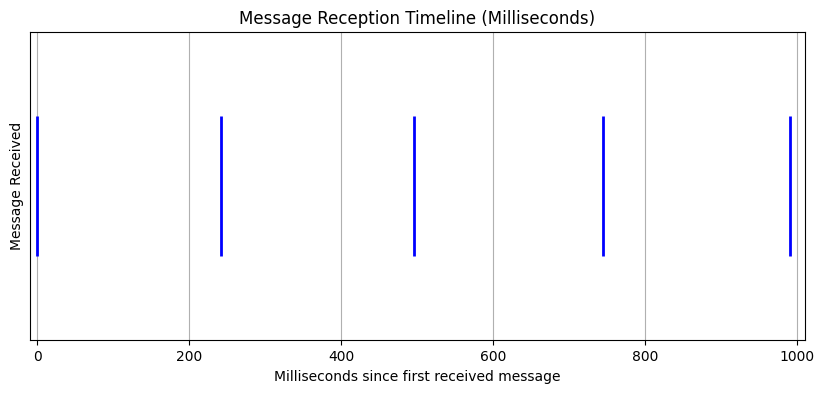

In [30]:
events = [(ts - received_timestamps[0]).total_seconds() * 1000 for ts in received_timestamps]

# Plotting
plt.figure(figsize=(10, 4))
plt.eventplot(events, lineoffsets=0, linelengths=0.5, color='b', linewidths=2)
plt.title('Message Reception Timeline (Milliseconds)')
plt.xlabel('Milliseconds since first received message')
plt.ylabel('Message Received')
plt.yticks([])  # Hide y-axis ticks as they are not informative
plt.grid(True)
plt.xlim(-10, 1010)
plt.show()